In [326]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
url = "https://in.tradingview.com/markets/stocks-india/market-movers-large-cap/"

In [348]:
response = requests.get(url)

In [349]:
response.status_code

200

In [350]:
soup = BeautifulSoup(response.content,'lxml')

In [351]:
print(soup.prettify())

<!DOCTYPE html>
<html class="is-not-authenticated is-not-pro theme-light" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <script nonce="ZEJqIQN+Exnl6AezbqAgfw==">
   window.initData = {};
  </script>
  <title>
   Large Cap (Big Cap) Stocks — India — TradingView — India
  </title>
  <link crossorigin="use-credentials" href="https://pricealerts.tradingview.com" rel="preconnect"/>
  <!-- { block promo_footer_css_bundle } -->
  <!-- { render_css_bundle('promo_footer') } -->
  <link crossorigin="anonymous" href="https://static.tradingview.com/static/bundles/89176.71dd92b8c646956c88b9.css" rel="stylesheet" type="text/css"/>
  <!-- { endblock promo_footer_css_bundle } -->
  <!-- { block personal_css_bundle } -->
  <!-- render_css_bundle('category_base') -->
  <!-- render_css_bundle('category') -->
  <link crossorigin="anonymous" href="https://static.tradi

In [352]:
symbol = []
name = []
sectors = []
market_cap = []
Price = []
Change = []
Volume = []
Rel_Volume = []
p_e = []
analyst_rating = []

In [353]:
for tabs in soup.find('table').find('tbody'):
  symbol.append(tabs.find('a').text)
  name.append(tabs.find('sup').text.strip())

  terms = tabs.find_all('td',class_='cell-RLhfr_y4 right-RLhfr_y4')

  sectors_analytics = tabs.find_all('td',class_='cell-RLhfr_y4 left-RLhfr_y4')


  if terms and len(terms) > 0:
    mar_cap = terms[0]
    market_cap.append(mar_cap.text.strip())
    price = terms[1]
    Price.append(price.text.strip())
    change = terms[2]
    Change.append(change.text.strip())
    volume = terms[3]
    Volume.append(volume.text.strip())
    rel_volume = terms[4]
    Rel_Volume.append(rel_volume.text.strip())
    pe = terms[5]
    p_e.append(pe.text.strip())
    sector = sectors_analytics[0]
    sectors.append(sector.text.strip())
    analytics = sectors_analytics[1]

    analyst_rating.append(analytics.text.strip())


  else:
    term = tabs.find_all('td',class_='cell-RLhfr_y4 right-RLhfr_y4 lastRowCell-TTjinvhT')

    sectors_analytic = tabs.find_all('td',class_='cell-RLhfr_y4 left-RLhfr_y4 lastRowCell-TTjinvhT')

    mar_cap = term[0]
    market_cap.append(mar_cap.text.strip())
    price = term[1]
    Price.append(price.text.strip())
    change = term[2]
    Change.append(change.text.strip())
    volume = term[3]
    Volume.append(volume.text.strip())
    rel_volume = term[4]
    Rel_Volume.append(rel_volume.text.strip())
    pe = term[5]
    p_e.append(pe.text.strip())
    sector = sectors_analytic[0]
    sectors.append(sector.text.strip())
    analytics = sectors_analytic[1]

    analyst_rating.append(analytics.text.strip())

### Making Data Frame

In [354]:
data = {
    'Symbol':symbol,
    'Name':name,
    'Sector':sectors,
    'Market Cap':market_cap,
    'Price':Price,
    'Change':Change,
    'Volume':Volume,
    'P/E':p_e,
    'Analyst Rating':analyst_rating
}

In [355]:
market = pd.DataFrame(data)

In [356]:
market.tail()

,Symbol,Name,Sector,Market Cap,Price,Change,Volume,P/E,Analyst Rating
95,MOTHERSON,SAMVRDHNA MTHRSN INTL LTD,Producer manufacturing,993.49 B INR,143.69 INR,+1.84%,10.2 M,23.99,Buy
96,HDFCAMC,HDFC AMC LTD,Finance,976.22 B INR,"4,702.40 INR",+2.92%,1.2 M,40.98,Buy
97,DIXON,DIXON TECHNO (INDIA) LTD,Electronic technology,971.2 B INR,"16,433.00 INR",+1.94%,453.69 K,124.60,Buy
98,JINDALSTEL,JINDAL STEEL & POWER LTD,Non-energy minerals,960.16 B INR,968.30 INR,+2.66%,2.55 M,34.75,Buy
99,CANBK,CANARA BANK,Finance,959.86 B INR,105.16 INR,−0.48%,22.58 M,5.44,Buy


In [357]:
market[market['P/E'] == '—']

,Symbol,Name,Sector,Market Cap,Price,Change,Volume,P/E,Analyst Rating
40,TATASTEEL,TATA STEEL LTD,Non-energy minerals,1.94 T INR,157.35 INR,+1.31%,57.07 M,—,Buy


In [358]:
market['Market Cap'].loc[0]

'19.27\u202fT INR'

In [359]:
market['Change'] = market['Change'].apply(lambda x: float(x[:-1][1:]))

In [360]:
market['Price'] = market['Price'].apply(lambda x : float(x[:-4].replace(",","")))

In [361]:
market['Volume'].unique()

array(['20.18\u202fM', '16.12\u202fM', '3.55\u202fM', '8.79\u202fM',
       '18.21\u202fM', '17.06\u202fM', '11.15\u202fM', '1.04\u202fM',
       '3.24\u202fM', '24.26\u202fM', '1.24\u202fM', '3.72\u202fM',
       '4.96\u202fM', '4.26\u202fM', '3.88\u202fM', '561.5\u202fK',
       '3.59\u202fM', '6.71\u202fM', '371.37\u202fK', '43.31\u202fM',
       '2.64\u202fM', '4.87\u202fM', '1.23\u202fM', '16.81\u202fM',
       '3.71\u202fM', '1.55\u202fM', '22.64\u202fM', '12.08\u202fM',
       '263.18\u202fK', '28.63\u202fM', '35.96\u202fM', '10.51\u202fM',
       '5.3\u202fM', '964.11\u202fK', '40.34\u202fM', '497.96\u202fK',
       '1.68\u202fM', '702\u202fK', '10.18\u202fM', '57.07\u202fM',
       '1.52\u202fM', '1.35\u202fM', '2.09\u202fM', '1.32\u202fM',
       '7.11\u202fM', '9.55\u202fM', '16.2\u202fM', '23.54\u202fM',
       '462.23\u202fK', '3.34\u202fM', '686.71\u202fK', '2.97\u202fM',
       '4.95\u202fM', '1.93\u202fM', '348.07\u202fK', '637.71\u202fK',
       '7.13\u202fM', '7.06\u2

In [362]:
def volume_conversion(row):
  if "K" in row:
    return float(row.replace("K","")) * 1000

  else:
    return float(row.replace("M","")) * 1000000

In [363]:
market['Volume'] = market['Volume'].apply(volume_conversion)

In [364]:
market['Market Cap'].unique()

array(['19.27\u202fT INR', '14.63\u202fT INR', '12.84\u202fT INR',
       '10.45\u202fT INR', '10.16\u202fT INR', '7.14\u202fT INR',
       '6.61\u202fT INR', '5.64\u202fT INR', '5.52\u202fT INR',
       '5.37\u202fT INR', '5.2\u202fT INR', '4.92\u202fT INR',
       '4.44\u202fT INR', '4.16\u202fT INR', '4.1\u202fT INR',
       '3.98\u202fT INR', '3.86\u202fT INR', '3.7\u202fT INR',
       '3.44\u202fT INR', '3.29\u202fT INR', '3.23\u202fT INR',
       '3.19\u202fT INR', '3.1\u202fT INR', '2.96\u202fT INR',
       '2.84\u202fT INR', '2.75\u202fT INR', '2.65\u202fT INR',
       '2.63\u202fT INR', '2.57\u202fT INR', '2.52\u202fT INR',
       '2.48\u202fT INR', '2.42\u202fT INR', '2.29\u202fT INR',
       '2.26\u202fT INR', '2.19\u202fT INR', '2.11\u202fT INR',
       '2.08\u202fT INR', '2.03\u202fT INR', '1.94\u202fT INR',
       '1.91\u202fT INR', '1.86\u202fT INR', '1.85\u202fT INR',
       '1.76\u202fT INR', '1.73\u202fT INR', '1.72\u202fT INR',
       '1.71\u202fT INR', '1.7\u202fT I

In [365]:
market['Market Cap'].sample(1).values

array(['10.45\u202fT INR'], dtype=object)

In [366]:
def market_cap_conversion(row):
  if "\u202fT INR" in row:
    return float(row.replace("\u202fT INR","")) * 1000000000000

  elif "\u202fB INR" in row:
    return float(row.replace("\u202fB INR","")) * 1000000000

In [367]:
market['Market Cap'] = market['Market Cap'].apply(market_cap_conversion)

In [368]:
market['Market Cap'].unique()

array([1.9270e+13, 1.4630e+13, 1.2840e+13, 1.0450e+13, 1.0160e+13,
       7.1400e+12, 6.6100e+12, 5.6400e+12, 5.5200e+12, 5.3700e+12,
       5.2000e+12, 4.9200e+12, 4.4400e+12, 4.1600e+12, 4.1000e+12,
       3.9800e+12, 3.8600e+12, 3.7000e+12, 3.4400e+12, 3.2900e+12,
       3.2300e+12, 3.1900e+12, 3.1000e+12, 2.9600e+12, 2.8400e+12,
       2.7500e+12, 2.6500e+12, 2.6300e+12, 2.5700e+12, 2.5200e+12,
       2.4800e+12, 2.4200e+12, 2.2900e+12, 2.2600e+12, 2.1900e+12,
       2.1100e+12, 2.0800e+12, 2.0300e+12, 1.9400e+12, 1.9100e+12,
       1.8600e+12, 1.8500e+12, 1.7600e+12, 1.7300e+12, 1.7200e+12,
       1.7100e+12, 1.7000e+12, 1.6500e+12, 1.6000e+12, 1.5800e+12,
       1.5700e+12, 1.5300e+12, 1.4900e+12, 1.4600e+12, 1.3600e+12,
       1.3400e+12, 1.3200e+12, 1.3100e+12, 1.3000e+12, 1.2700e+12,
       1.2400e+12, 1.2300e+12, 1.2200e+12, 1.2100e+12, 1.1900e+12,
       1.1400e+12, 1.1300e+12, 1.1200e+12, 1.1100e+12, 1.1000e+12,
       1.0700e+12, 1.0500e+12, 1.0400e+12, 1.0300e+12, 1.0200e

In [369]:
market['P/E'].unique()

array(['28.25', '20.93', '26.68', '33.69', '20.83', '9.29', '25.06',
       '34.25', '51.97', '26.87', '12.34', '33.11', '26.45', '18.93',
       '36.52', '28.08', '27.33', '13.42', '53.45', '15.09', '36.92',
       '38.90', '96.71', '8.00', '27.39', '40.96', '17.93', '20.48',
       '98.11', '11.80', '51.31', '7.05', '76.96', '72.08', '416.96',
       '30.95', '60.92', '35.52', '16.29', '14.68', '—', '128.19',
       '48.98', '17.99', '74.17', '11.47', '59.90', '43.81', '107.73',
       '26.16', '79.81', '89.26', '76.34', '33.99', '110.98', '31.71',
       '32.47', '10.59', '10.16', '31.81', '32.27', '6.02', '18.71',
       '60.42', '49.57', '71.28', '59.29', '32.05', '111.92', '46.66',
       '13.29', '9.77', '5.85', '23.03', '64.40', '114.97', '6.00',
       '77.92', '87.59', '92.61', '59.35', '57.03', '41.15', '108.31',
       '50.36', '10.62', '5.60', '106.44', '6.54', '45.98', '18.24',
       '67.95', '73.37', '77.62', '23.99', '40.98', '124.60', '34.75',
       '5.44'], dtype=ob

In [370]:
market['P/E'] = market['P/E'].replace('—',np.nan)

In [371]:
market['P/E'] = market['P/E'].apply(lambda x: float(x))

In [372]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          100 non-null    object 
 1   Name            100 non-null    object 
 2   Sector          100 non-null    object 
 3   Market Cap      100 non-null    float64
 4   Price           100 non-null    float64
 5   Change          100 non-null    float64
 6   Volume          100 non-null    float64
 7   P/E             99 non-null     float64
 8   Analyst Rating  100 non-null    object 
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [377]:
market.to_csv('Scrapped data of Indian Large cap company')

### Basic Analytics

In [373]:
market.isnull().sum()

,0
Symbol,0
Name,0
Sector,0
Market Cap,0
Price,0
Change,0
Volume,0
P/E,1
Analyst Rating,0


In [374]:
market.describe()

,Market Cap,Price,Change,Volume,P/E
count,1.000000e+02,100.00000,100.000000,1.000000e+02,99.000000
mean,2.690007e+12,2834.13420,1.492200,7.476657e+06,47.637172
std,2.915308e+12,4328.50237,1.132716,1.011369e+07,49.099705
min,9.598600e+11,98.32000,0.010000,1.020000e+05,5.440000
25%,1.205000e+12,443.03750,0.607500,1.107500e+06,18.820000
50%,1.675000e+12,1452.50000,1.270000,3.570000e+06,33.990000
75%,2.870000e+12,3153.82500,2.207500,9.910000e+06,62.660000
max,1.927000e+13,31400.00000,5.070000,5.707000e+07,416.960000


In [382]:
market.sort_values(by='Market Cap',ascending=False).head(10)

,Symbol,Name,Sector,Market Cap,Price,Change,Volume,P/E,Analyst Rating
0,RELIANCE,RELIANCE INDUSTRIES LTD,Energy minerals,1.927000e+13,1454.20,2.09,20180000.0,28.25,Strong buy
1,HDFCBANK,HDFC BANK LTD,Finance,1.463000e+13,1933.80,1.21,16120000.0,20.93,Strong buy
2,TCS,TATA CONSULTANCY SERV LTD,Technology services,1.284000e+13,3579.90,0.88,3550000.0,26.68,Buy
3,BHARTIARTL,BHARTI AIRTEL LTD,Communications,1.045000e+13,1867.20,1.80,8790000.0,33.69,Strong buy
4,ICICIBANK,ICICI BANK LTD.,Finance,1.016000e+13,1450.80,1.72,18210000.0,20.83,Strong buy
5,SBIN,STATE BANK OF INDIA,Finance,7.140000e+12,807.75,0.88,17060000.0,9.29,Buy
6,INFY,INFOSYS LTD,Technology services,6.610000e+12,1613.00,1.29,11150000.0,25.06,Buy
7,BAJFINANCE,BAJAJ FINANCE LTD,Finance,5.640000e+12,9188.50,1.18,1040000.0,34.25,Buy
8,HINDUNILVR,HINDUSTAN UNILEVER LTD.,Consumer non-durables,5.520000e+12,2355.20,0.20,3240000.0,51.97,Buy
9,ITC,ITC LTD,Consumer non-durables,5.370000e+12,432.65,0.83,24260000.0,26.87,Strong buy


<Axes: >

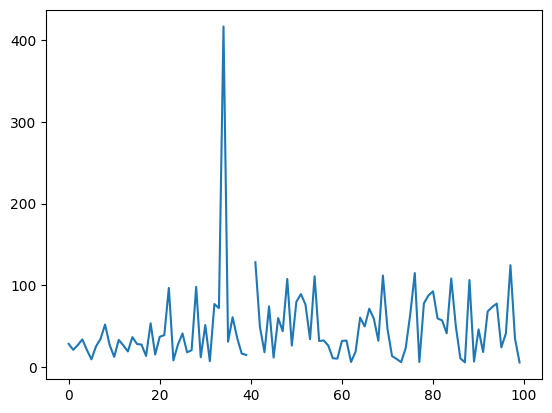

In [375]:
market['P/E'].plot(kind='line')

<Axes: ylabel='Symbol'>

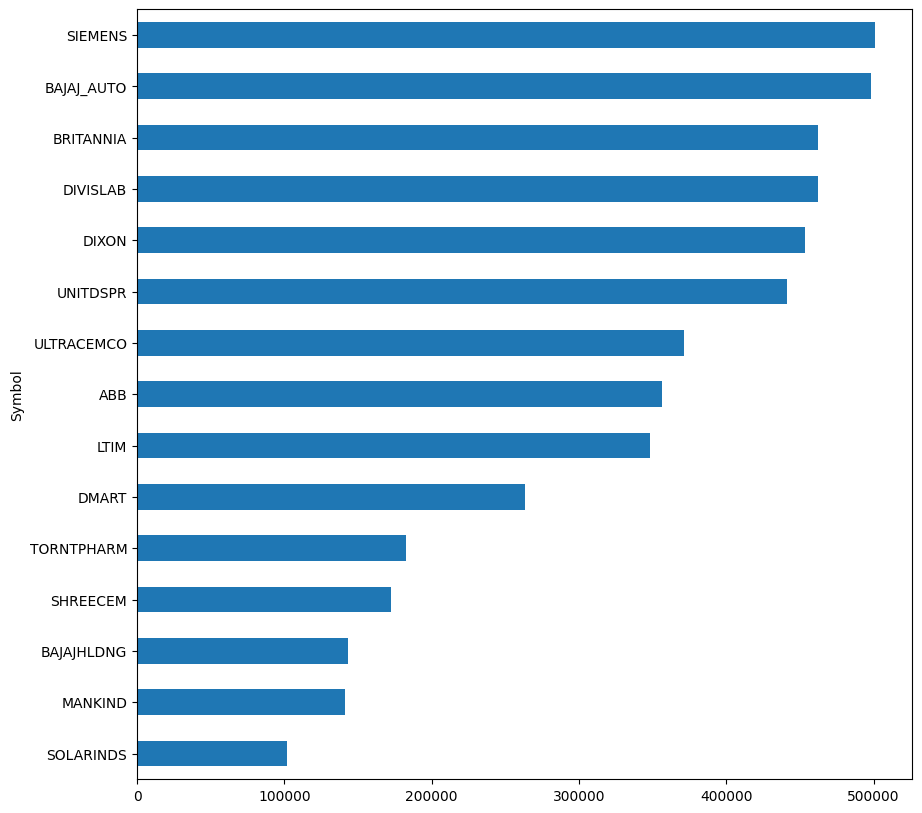

In [389]:
market.groupby('Symbol')['Volume'].mean().sort_values()[:15].plot(kind='barh',figsize=(10,10))

In [336]:
df = pd.pivot_table(data=market,index=['Sector','Symbol'],columns='Analyst Rating',values='Price')

In [337]:
df = df.fillna(0)

In [338]:
df

Analyst Rating                    Buy  Neutral  Sell  Strong buy  Strong sell
Sector            Symbol                                                     
Communications    BHARTIARTL     0.00      0.0   0.0      1867.0          0.0
Consumer durables BAJAJ_AUTO  8331.00      0.0   0.0         0.0          0.0
                  EICHERMOT   5468.50      0.0   0.0         0.0          0.0
                  HYUNDAI        0.00      0.0   0.0      1836.8          0.0
                  M&M            0.00      0.0   0.0      3145.0          0.0
...                               ...      ...   ...         ...          ...
Utilities         ADANIPOWER     0.00      0.0   0.0       542.7          0.0
                  GAIL         184.98      0.0   0.0         0.0          0.0
                  NTPC         342.00      0.0   0.0         0.0          0.0
                  POWERGRID    300.00      0.0   0.0         0.0          0.0
                  TATAPOWER      0.00    398.0   0.0         0.0          0.0

[100 rows x 5 columns]

<Axes: xlabel='Analyst Rating', ylabel='Sector-Symbol'>

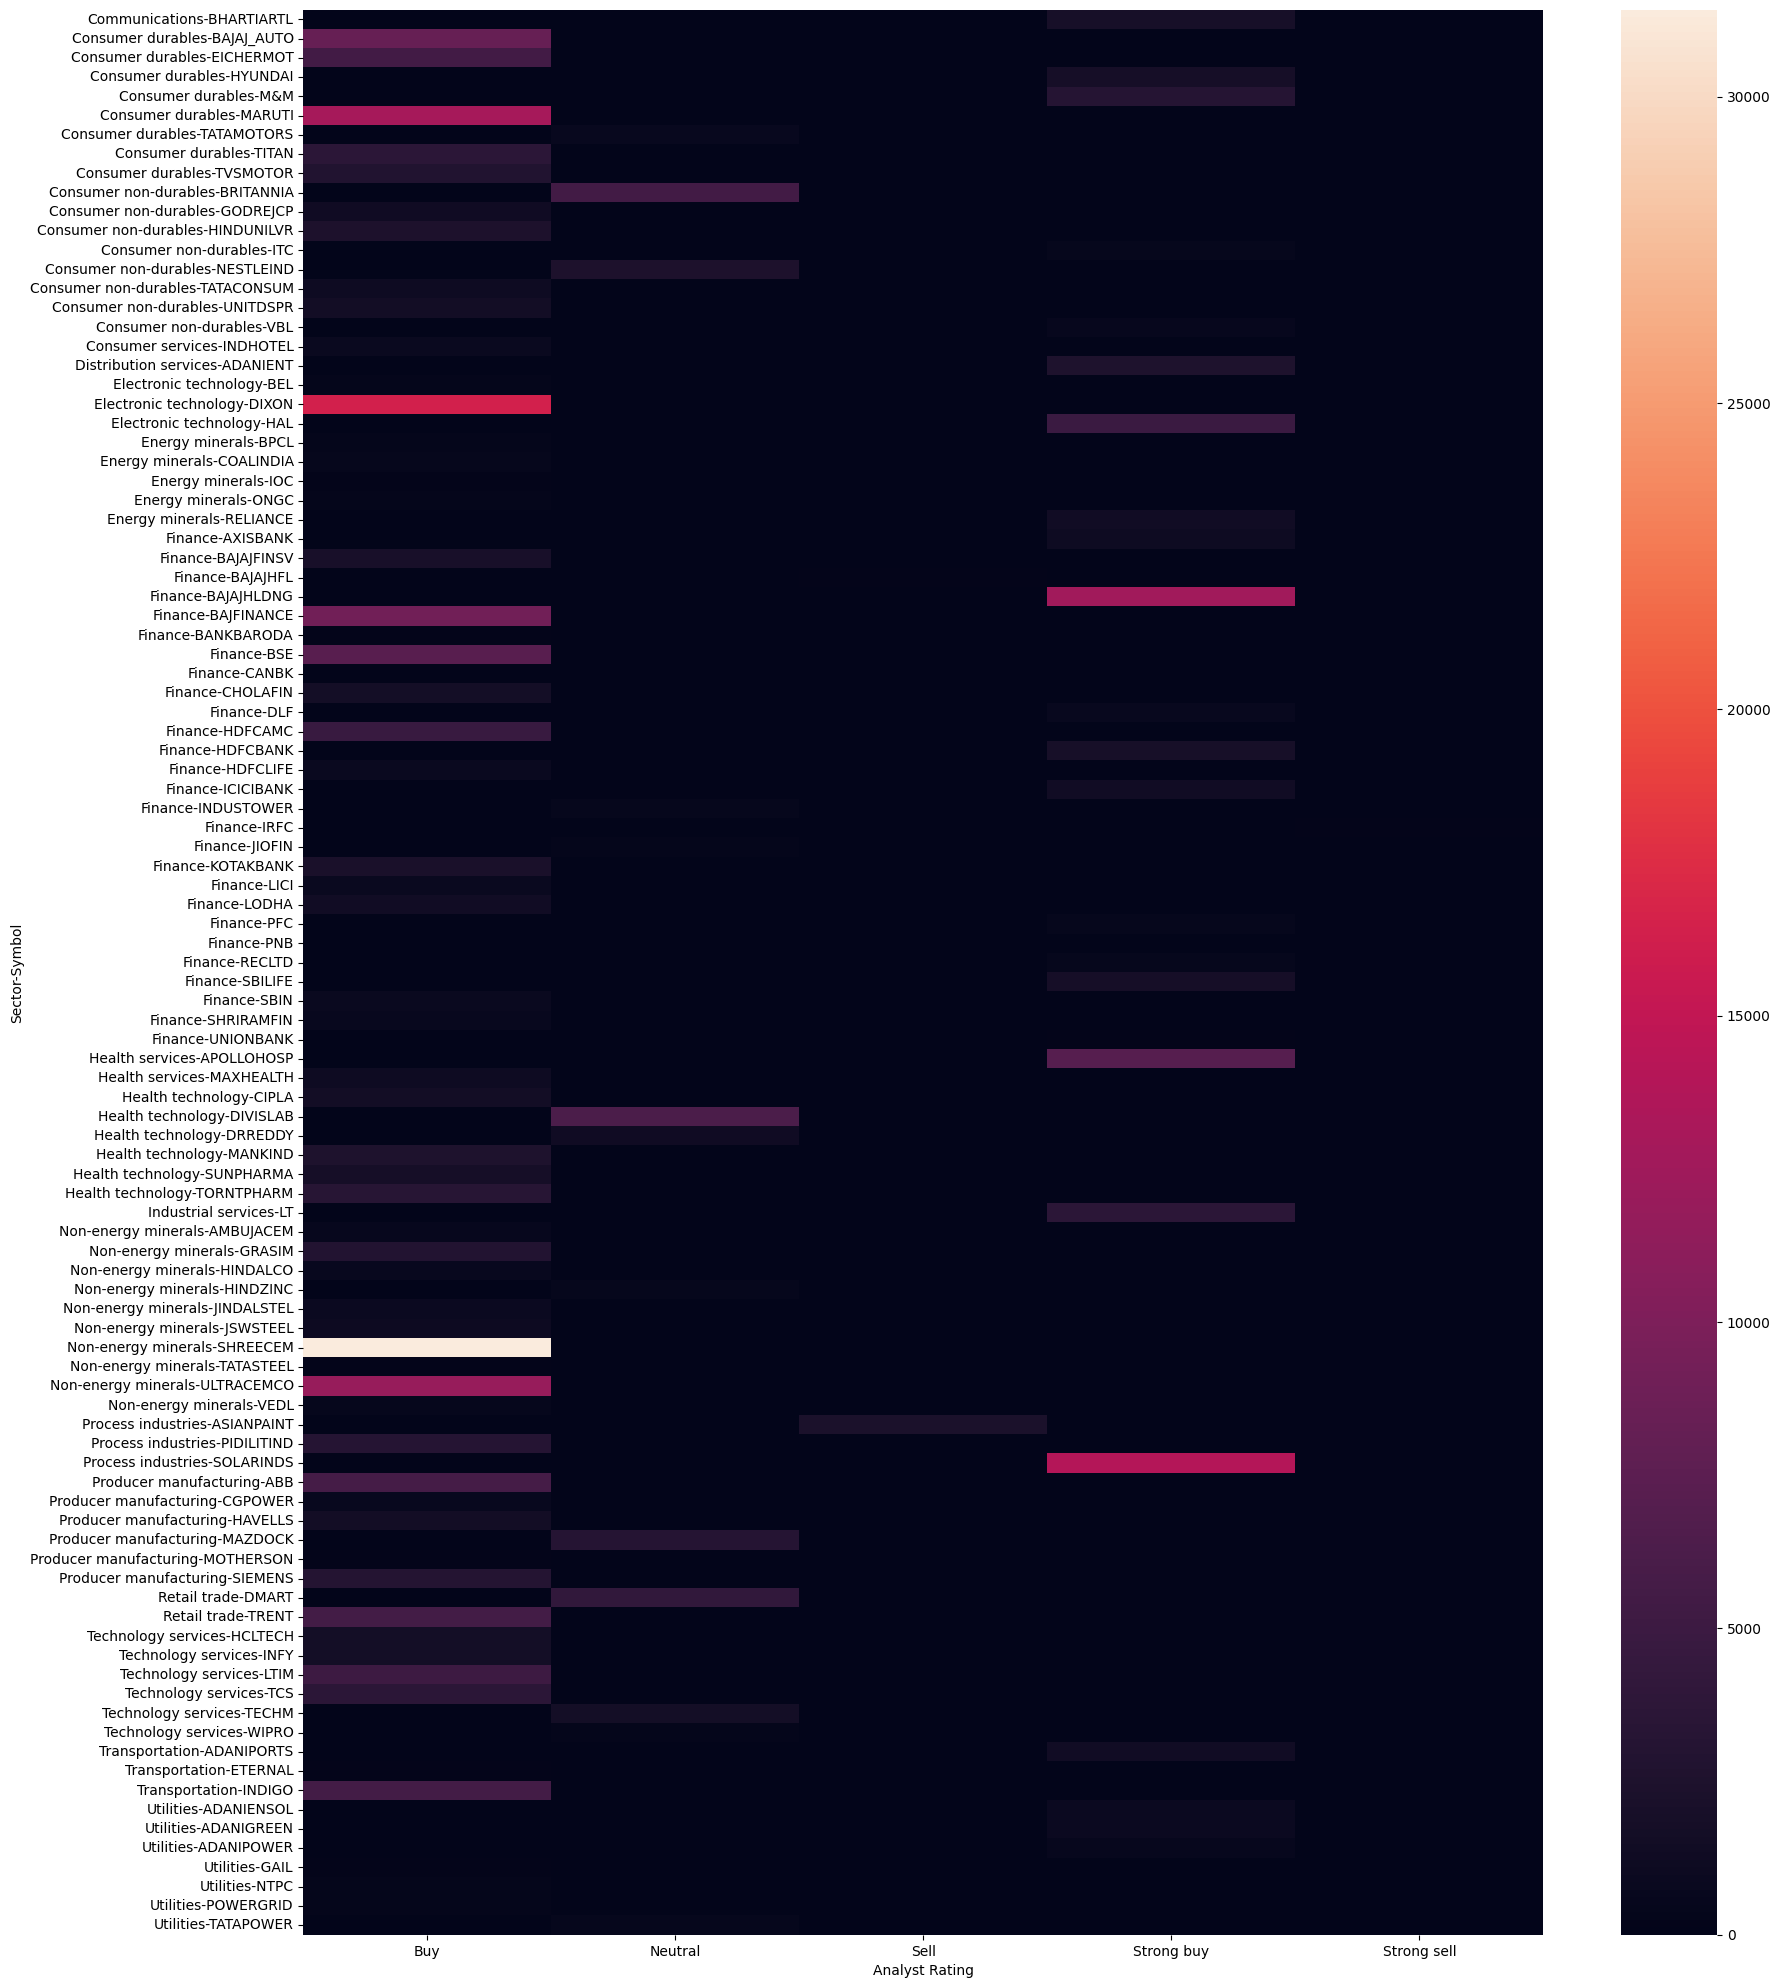

In [346]:
plt.figure(figsize=(20,25))
sns.heatmap(df)